# Perceptrón Multicapa


In [13]:
path_file = "./data_csv/XOR_trn.csv"

Ingrese la tasa de aprendizaje: 0.1
Ingrese el número máximo de iteraciones: 1000
Precisión en el conjunto de prueba: 0.00


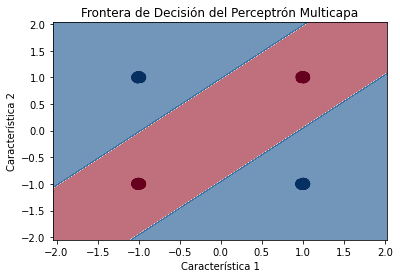

In [34]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Función para cargar datos desde un archivo CSV
def load_data(file_path):
    df = pd.read_csv(file_path, header=None)
    data = df.values
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

# Función para visualizar los datos y la frontera de decisión
def plot_decision_boundary(X, y, mlp):
    # Crear una malla de puntos para la visualización
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Realizar predicciones en la malla
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Visualizar los datos de entrenamiento
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.title("Frontera de Decisión del Perceptrón Multicapa")
    plt.show()

# Datos de entrenamiento: OR lógico
X_train, y_train = load_data(path_file)

# Solicitar al usuario los pesos de entrenamiento y el número de iteraciones
learning_rate = float(input("Ingrese la tasa de aprendizaje: "))
max_iter = int(input("Ingrese el número máximo de iteraciones: "))

# Crear y entrenar un perceptrón multicapa con los parámetros proporcionados por el usuario
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=max_iter, random_state=0, learning_rate_init=learning_rate)
mlp.fit(X_train, y_train)

# Datos de prueba
X_test = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y_test = np.array([1, 0, 0, 0])  # Etiquetas correspondientes a los patrones de prueba

# Realizar predicciones en los datos de prueba
y_pred = mlp.predict(X_test)

# Calcular la precisión en los datos de prueba
accuracy = np.mean(y_test == y_pred)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

# Visualizar la frontera de decisión
plot_decision_boundary(X_train, y_train, mlp)
